<a href="https://colab.research.google.com/github/43pratik/DL_Lab/blob/main/DL_P8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical No. 08**

Implement autoencoders for dimensionality reduction or feature learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense



In [3]:
# Step 1: Load and preprocess the data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

In [4]:
# Step 2: Define autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 64  # Dimension of the encoded representation
input_layer = Input(shape=(input_dim,))
# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model (for feature extraction)
encoder = Model(input_layer, encoded)

In [5]:
# Step 3: Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [6]:
# Step 4: Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0912 - val_loss: 0.0294
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0256 - val_loss: 0.0173
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0168 - val_loss: 0.0139
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0137 - val_loss: 0.0118
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0117 - val_loss: 0.0104
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0091 - val_loss: 0.0084
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0077 - val_loss: 0.0072
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:
# Step 5: Encode test data
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


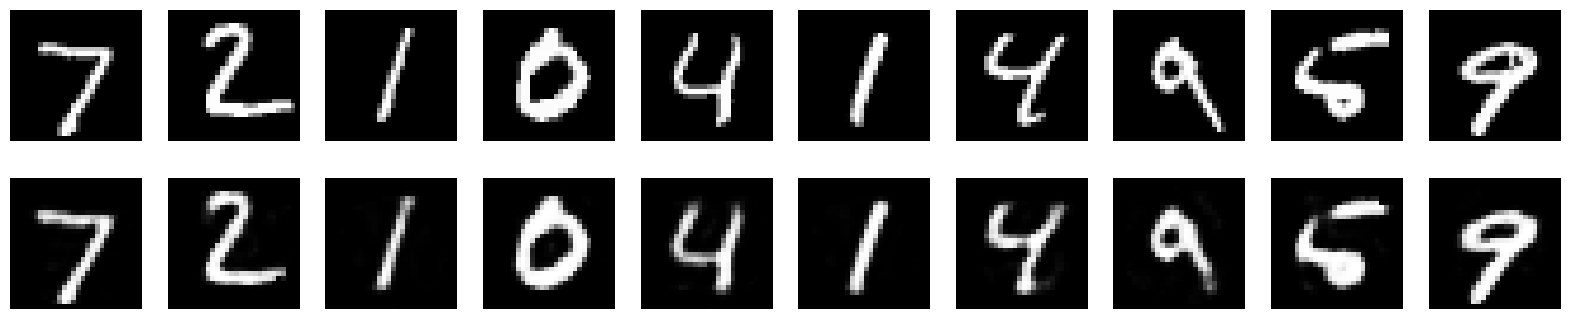

In [8]:
# Step 6: Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()